**Import packages**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

**Read the data**

In [3]:
visa_df=pd.read_csv(r"C:\Users\lenovo\Desktop\Python\Datafiles\Visadataset.csv")
visa_df.head(2)

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified


**Select the numerical coulmns**

In [4]:
visa_df.select_dtypes(exclude='object').columns

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [5]:
visa_df.select_dtypes(exclude='object')

,no_of_employees,yr_of_estab,prevailing_wage
0,14513,2007,592.2029
1,2412,2002,83425.6500
2,44444,2008,122996.8600
3,98,1897,83434.0300
4,1082,2005,149907.3900
...,...,...,...
25475,2601,2008,77092.5700
25476,3274,2006,279174.7900
25477,1121,1910,146298.8500
25478,1918,1887,86154.7700


**prevailing_wage**

- len

- max

- min

- mean

- median

- std

- 75%

- 50%

- 25%

**count or len**

In [4]:
len(visa_df['prevailing_wage'])

25480

**max**

In [5]:
max(visa_df['prevailing_wage']) # Keyword

319210.27

In [6]:
visa_df['prevailing_wage'].max() # Pandas

319210.27

In [7]:
np.max(visa_df['prevailing_wage']) # numpy

319210.27

**min**

In [8]:
min(visa_df['prevailing_wage']) 

2.1367

In [9]:
visa_df['prevailing_wage'].min()


2.1367

In [10]:
np.min(visa_df['prevailing_wage'])

2.1367

In [11]:
#instead of len can we use nunique ?
#how many uniques values different
#how many total values different 

**mean**

In [12]:
visa_df['prevailing_wage'].mean()

74455.81459209183

In [13]:
np.mean(visa_df['prevailing_wage'])

74455.81459209183

**median**

In [14]:
visa_df['prevailing_wage'].median()

70308.20999999999

In [15]:
np.median(visa_df['prevailing_wage'])

70308.20999999999

**std**

In [16]:
visa_df['prevailing_wage'].std()

52815.94232687357

In [17]:
np.std(visa_df['prevailing_wage'])

52814.90589711402

**Mode is not good option because it is numerical variable**

In [18]:
##All together
wage_count=round(len(visa_df['prevailing_wage']),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)
list_values=[wage_count,wage_min,wage_max,
             wage_mean,wage_median,wage_std]
index_val=['count','min','max','mean','median','std']
pd.DataFrame(list_values,
             columns=['prevailing_wage'],
             index=index_val)

,prevailing_wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94


**Percentile and Quantile**

- Percentile:

    - np.percentile()

    - It will take two arguments

      - data :a

      - percentile: q  the values varies from 0 to 100

      - if you want 50P data q=50

- Quantile:

    - np.quantile()

    - It will take two arguments

      - data :a

      - percentile: q  the values varies from 0 to 1

      - if you want 50p q=0.5

**25p-50p-75p**

In [19]:
wage_25p=round(np.percentile(visa_df['prevailing_wage'],25),2)
wage_50p=round(np.percentile(visa_df['prevailing_wage'],50),2)
wage_75p=round(np.percentile(visa_df['prevailing_wage'],75),2)

print(f"the 25% data is {wage_25p}")
print(f"the 50% data is {wage_50p}")
print(f"the 75% data is {wage_75p}")

the 25% data is 34015.48
the 50% data is 70308.21
the 75% data is 107735.51


In [20]:
345.89678

345.89678

In [21]:
round(345.89678,2)

345.9

In [22]:
wage_25p=round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50p=round(np.quantile(visa_df['prevailing_wage'],0.50),2)
wage_75p=round(np.quantile(visa_df['prevailing_wage'],0.75),2)

print(f"the 25% data is {wage_25p}")
print(f"the 50% data is {wage_50p}")
print(f"the 75% data is {wage_75p}")

the 25% data is 34015.48
the 50% data is 70308.21
the 75% data is 107735.51


**Understand the percentiles**

- defination of 25percentile

    - there 25% of employees has salary less than 34015

    - total employees= 25480 

    - 25% of employees= 25*25480/100= 6370

    - 6370 employees salary less than 34015


In [23]:
con=visa_df['prevailing_wage']<34015
len(visa_df[con])

6370

In [24]:
con=visa_df['prevailing_wage']<wage_25p
len(visa_df[con])

6370

In [25]:
con=visa_df['prevailing_wage']<wage_50p
len(visa_df[con])

#50*25480/100

12740

In [26]:
con=visa_df['prevailing_wage']<wage_75p
len(visa_df[con])

19110

**Emperical rule (68-95-99.7)**

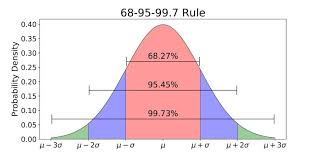

- First calculate mean value

- Second calculate std value

- Con1: mean-1*std

- Con2: mean+1*std

- If you apply above conditions on wage data , the output count
  should be equal to 68percentile data

- 68% of total employees: 17326

In [27]:
v1=wage_mean-1*wage_std
v2=wage_mean+1*wage_std
con1=visa_df['prevailing_wage']>v1
con2=visa_df['prevailing_wage']<v2

count1=len(visa_df[con1 & con2])
###############################################################
count1 ,68*25480/100

(17171, 17326.4)

In [28]:
v1=wage_mean-2*wage_std
v2=wage_mean+2*wage_std
con1=visa_df['prevailing_wage']>v1
con2=visa_df['prevailing_wage']<v2

count1=len(visa_df[con1 & con2])
###############################################################
count1 ,95*25480/100

(24582, 24206.0)

In [29]:
v1=wage_mean-3*wage_std
v2=wage_mean+3*wage_std
con1=visa_df['prevailing_wage']>v1
con2=visa_df['prevailing_wage']<v2

count1=len(visa_df[con1 & con2])
###############################################################
count1 ,99.7*25480/100

(25186, 25403.56)

In [30]:
##All together
wage_count=round(len(visa_df['prevailing_wage']),2)
wage_min=round(visa_df['prevailing_wage'].min(),2)
wage_max=round(visa_df['prevailing_wage'].max(),2)
wage_mean=round(visa_df['prevailing_wage'].mean(),2)
wage_median=round(visa_df['prevailing_wage'].median(),2)
wage_std=round(visa_df['prevailing_wage'].std(),2)
########################################################
wage_25p=round(np.quantile(visa_df['prevailing_wage'],0.25),2)
wage_50p=round(np.quantile(visa_df['prevailing_wage'],0.50),2)
wage_75p=round(np.quantile(visa_df['prevailing_wage'],0.75),2)
##################################################################
list_values=[wage_count,wage_min,wage_max,
             wage_mean,wage_median,wage_std,
            wage_25p,wage_50p,wage_75p]
index_val=['count','min','max',
           'mean','median','std',
          '25%','50%','75%']
pd.DataFrame(list_values,
             columns=['prevailing_wage'],
             index=index_val)

,prevailing_wage
count,25480.00
min,2.14
max,319210.27
mean,74455.81
median,70308.21
std,52815.94
25%,34015.48
50%,70308.21
75%,107735.51


In [10]:
##All together
l1=[]
cols=visa_df.select_dtypes(exclude='object').columns
for i in cols:
    countt=round(len(visa_df[i]),2)
    minn=round(visa_df[i].min(),2)
    maax=round(visa_df[i].max(),2)
    mean=round(visa_df[i].mean(),2)
    median=round(visa_df[i].median(),2)
    std=round(visa_df[i].std(),2)
    ########################################################
    p_25=round(np.quantile(visa_df[i],0.25),2)
    p_50=round(np.quantile(visa_df[i],0.50),2)
    p_75=round(np.quantile(visa_df[i],0.75),2)
    ##################################################################
    l1.append([countt,minn,maax,mean,median,std,p_25,p_50,p_75])

index_val=['count','min','max',
           'mean','median','std',
          '25%','50%','75%']
df=pd.DataFrame(l1,
                columns=index_val,
                index=cols).T
df

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.00,25480.00,25480.00
min,-26.00,1800.00,2.14
max,602069.00,2016.00,319210.27
mean,5667.04,1979.41,74455.81
median,2109.00,1997.00,70308.21
std,22877.93,42.37,52815.94
25%,1022.00,1976.00,34015.48
50%,2109.00,1997.00,70308.21
75%,3504.00,2005.00,107735.51


In [15]:
cols=visa_df.select_dtypes(exclude='object').columns
cols


Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [16]:
len(cols)

3

In [9]:
# Whatever we did till now
# will incresae our python skil

**Describe**

- It is for only numerical data

In [43]:
visa_df.describe()

,no_of_employees,yr_of_estab,prevailing_wage
count,25480.000000,25480.000000,25480.000000
mean,5667.043210,1979.409929,74455.814592
std,22877.928848,42.366929,52815.942327
min,-26.000000,1800.000000,2.136700
25%,1022.000000,1976.000000,34015.480000
50%,2109.000000,1997.000000,70308.210000
75%,3504.000000,2005.000000,107735.512500
max,602069.000000,2016.000000,319210.270000


In [13]:
len(visa_df['prevailing_wage'])

25480

**Histogram**

- Histogram can get by matplotlib

- Histogram can get by seaborn also

- plt.hist()

(array([6038., 5504., 5681., 4551., 2334.,  624.,  373.,  240.,  114.,
          21.]),
 array([2.13670000e+00, 3.19229500e+04, 6.38437634e+04, 9.57645767e+04,
        1.27685390e+05, 1.59606203e+05, 1.91527017e+05, 2.23447830e+05,
        2.55368643e+05, 2.87289457e+05, 3.19210270e+05]),
 <BarContainer object of 10 artists>)

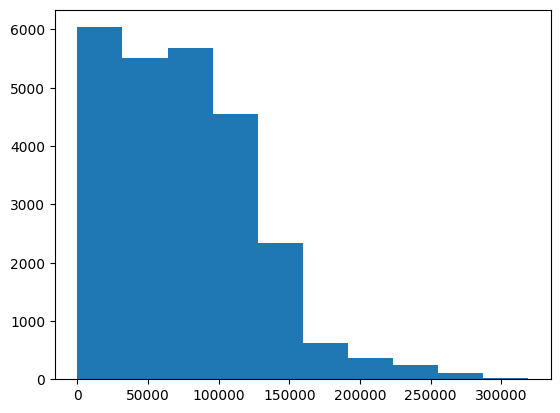

In [11]:
import matplotlib.pyplot as plt
plt.hist(visa_df['prevailing_wage'])

from interval range 

- 2.13670000e+00 to 3.19229500e+04

  - 6038 members have salary between above range

- 3.19229500e+04 to 6.38437634e+04

  - 5504 members have salary

- Histogram will give 3 outputs

    - frequency

        - in each interval range how many observations are there

    - interval

        - interval range

    - number of intervals

**Check point-1**

In [47]:
2.13670000e+00, 3.19229500e+04

(2.1367, 31922.95)

In [49]:
con1=visa_df['prevailing_wage']>=2.1367
con2=visa_df['prevailing_wage']<31922.95
len(visa_df[con1&con2])

6038

**Bins**

<BarContainer object of 40 artists>


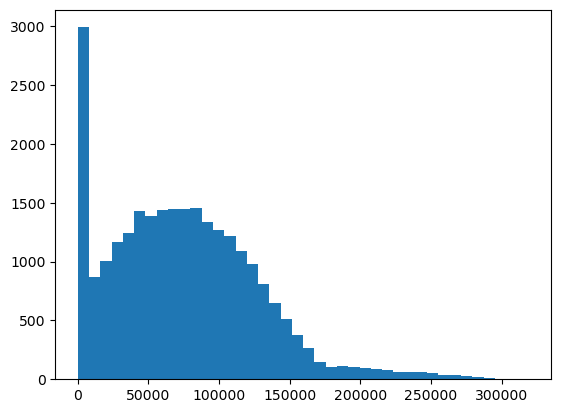

In [53]:
import matplotlib.pyplot as plt
f,i,n=plt.hist(visa_df['prevailing_wage'],
        bins=40)

print(n)

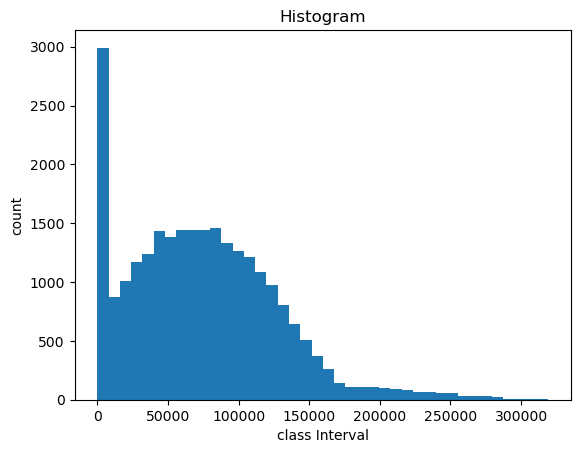

In [55]:
import matplotlib.pyplot as plt
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.title("Histogram")
plt.xlabel("class Interval")
plt.ylabel("count")
plt.show()

In [57]:
cols

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

Text(0, 0.5, 'count')

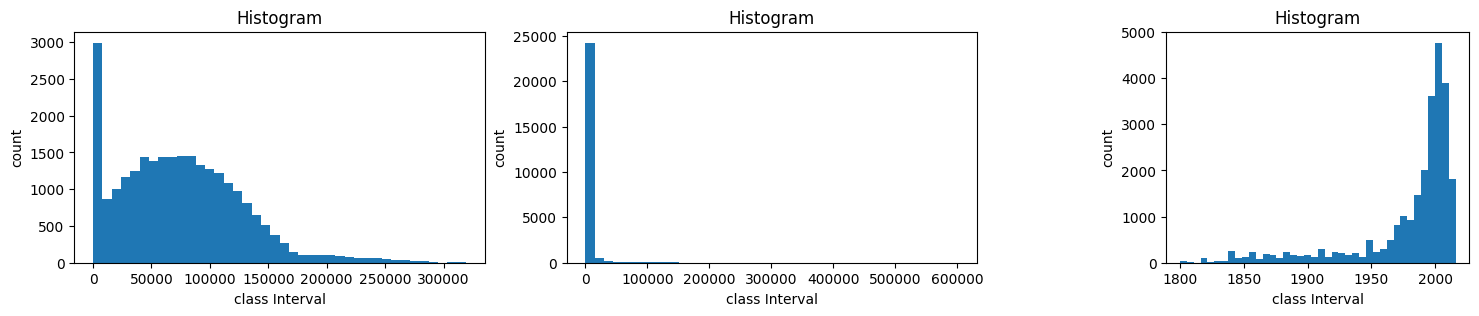

In [19]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
plt.subplot(1,3,1)
plt.hist(visa_df['prevailing_wage'],bins=40)
plt.title("Histogram")
plt.xlabel("class Interval")
plt.ylabel("count")

plt.subplot(1,3,2)
plt.hist(visa_df['no_of_employees'],bins=40)
plt.title("Histogram")
plt.xlabel("class Interval")
plt.ylabel("count")


plt.subplot(1,3,3)
plt.hist(visa_df['yr_of_estab'],bins=40)
plt.title("Histogram")
plt.xlabel("class Interval")
plt.ylabel("count")

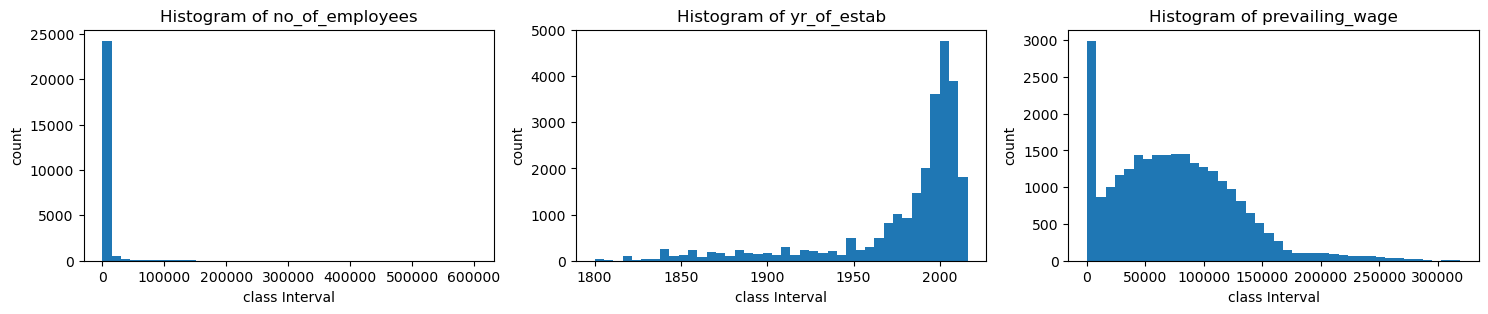

In [64]:
import matplotlib.pyplot as plt
plt.figure(figsize=(18,3))
for i in range(len(cols)):
    plt.subplot(1,len(cols),i+1)
    plt.hist(visa_df[cols[i]],bins=40)
    plt.title(f"Histogram of {cols[i]}")
    plt.xlabel("class Interval")
    plt.ylabel("count")

**Histogram using seaborn**

- histplot

- distplot

In [65]:
import seaborn as sns

C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Count'>

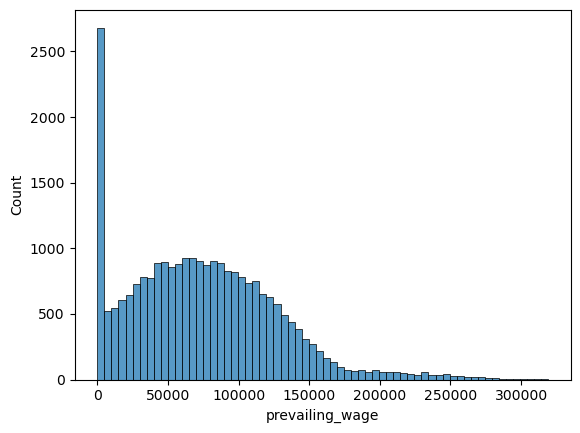

In [66]:
sns.histplot(visa_df['prevailing_wage'])

<Axes: xlabel='prevailing_wage', ylabel='Density'>

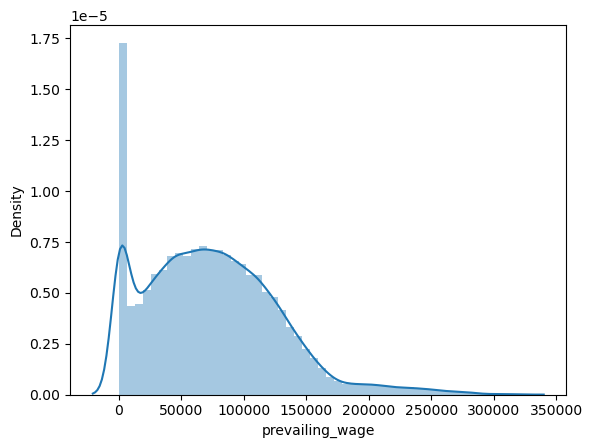

In [69]:
import warnings
warnings.filterwarnings("ignore")

sns.distplot(visa_df['prevailing_wage'])

C:\Users\omkar\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


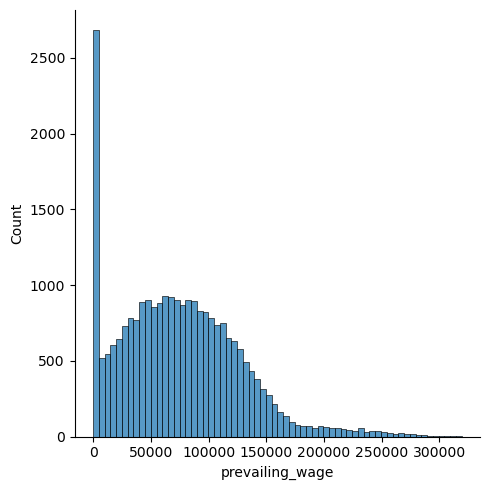

In [68]:
sns.displot(visa_df['prevailing_wage'])